## face detection model MobileNet SSD v2 (face) - no labels required
* Expects 320x320 image
* Model type: Integer

In [1]:
import numpy as np
import os
from PIL import Image, ImageDraw
from helpers import draw_box

import tflite_runtime.interpreter as tflite

In [2]:
all_models_dir = '/home/pi/github/edgetpu/test_data/'

In [3]:
all_models = os.listdir(all_models_dir)

In [4]:
for filename in all_models:
    if 'ssd_v2' in filename:
        print(filename)

mobilenet_ssd_v2_face_quant_postprocess.tflite
mobilenet_ssd_v2_face_quant_postprocess_edgetpu.tflite
mobilenet_ssd_v2_coco_quant_postprocess_edgetpu.tflite
mobilenet_ssd_v2_coco_quant_postprocess.tflite


In [5]:
model_file = all_models_dir + 'mobilenet_ssd_v2_face_quant_postprocess.tflite'
model_file

'/home/pi/github/edgetpu/test_data/mobilenet_ssd_v2_face_quant_postprocess.tflite'

In [6]:
interpreter = tflite.Interpreter(model_path=model_file)
interpreter.allocate_tensors()

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# NxHxWxC, H:1, W:2. Note this is not maintaining aspect ratio
input_height = input_details[0]['shape'][1]
input_width = input_details[0]['shape'][2]

In [7]:
input_details[0]['dtype']

numpy.uint8

In [8]:
image_file = 'images/' + 'face.jpg'
# image = all_models_dir + 'parrot.jpg'
image_file

'images/face.jpg'

In [9]:
image = Image.open(image_file)
resized_image = image.resize((input_width, input_height))

In [10]:
# add N dim
input_data = np.expand_dims(resized_image, axis=0)

In [11]:
%%time
interpreter.set_tensor(input_details[0]['index'], input_data)

interpreter.invoke()

boxes = interpreter.get_tensor(output_details[0]['index'])[0] # Bounding box coordinates of detected objects
classes = interpreter.get_tensor(output_details[1]['index'])[0] # Class index of detected objects
scores = interpreter.get_tensor(output_details[2]['index'])[0] # Confidence of detected objects

CPU times: user 330 ms, sys: 20.2 ms, total: 351 ms
Wall time: 363 ms


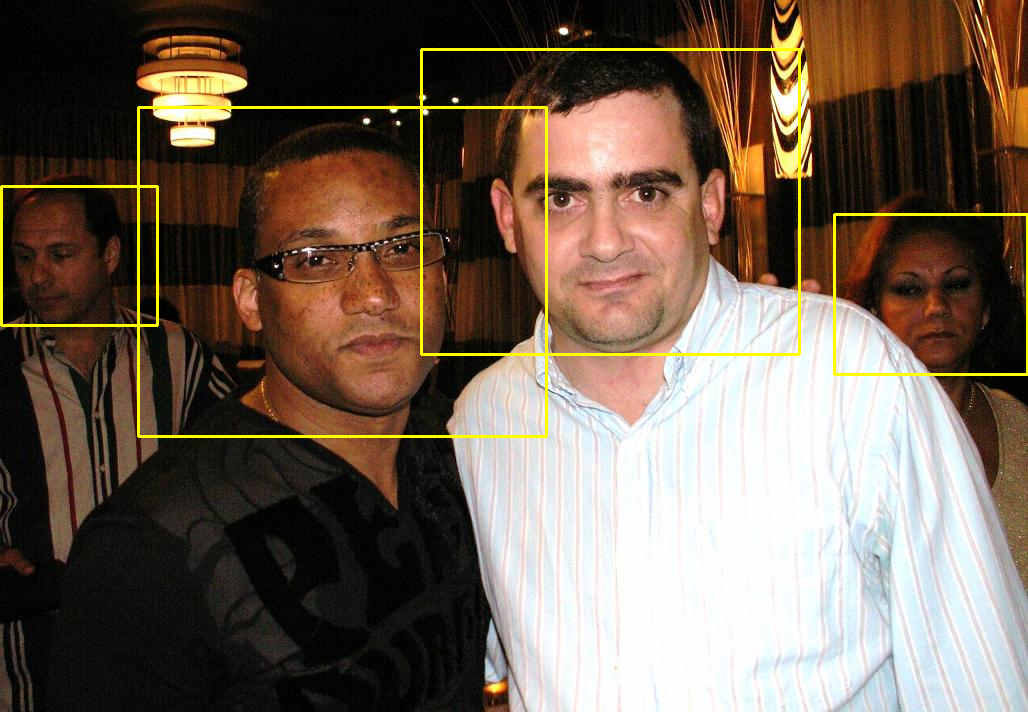

In [12]:
min_conf_threshold = 0.3
draw = ImageDraw.Draw(image)
img_width = image.size[0]
img_height = image.size[1]

for i in range(len(scores)):
    if ((scores[i] > min_conf_threshold) and (scores[i] <= 1.0)):
        y_min = boxes[i][0]
        x_min = boxes[i][1]
        y_max = boxes[i][2]
        x_max = boxes[i][3]
        box = (y_min, x_min, y_max, x_max)
        draw_box(draw, box, img_width, img_height)

display(image)
